In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [20]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: ignored

In [ ]:
#%cd /content/drive/MyDrive/data

In [21]:
!ls

CITATION.cff  LICENSE		       model-index.yml	requirements.txt  tools
configs       LICENSES.md	       pytest.ini	resources
demo	      MANIFEST.in	       README.md	setup.cfg
docker	      mmseg		       README_zh-CN.md	setup.py
docs	      mmsegmentation.egg-info  requirements	tests


In [ ]:
#!mv  -v perde/tumu/jpg/* yeni_perde_birlesik/JPEGImages

In [ ]:
#!mv  -v perde/tumu/annotion/* yeni_perde_birlesik/SegmentationClassPNG

In [ ]:
#!ls /content/drive/MyDrive/data/yeni_perde_birlesik/JPEGImages | wc -l

In [ ]:
#!ls /content/drive/MyDrive/data/yeni_perde_birlesik/SegmentationClassPNG | wc -l

In [1]:
data_root = '/content/drive/MyDrive/data/yeni_perde_birlesik'
img_dir='JPEGImages'
ann_dir='SegmentationClassPNG'

#JPEGImages klasöründeki fazla resimleri siliyoruz
# 1 defalık gerekli kısım

import os
import os.path as osp
jDelNum=0
pDelNum=0



#annotion'ı olmayan resimleri siliyoruz
resimler=os.listdir(osp.join(data_root, img_dir))
segmentler = os.listdir(osp.join(data_root, ann_dir))

for r in resimler:
  if (r[:-3]+'png' not in segmentler):
    os.remove(osp.join(data_root, img_dir,r))
    jDelNum+=1

#resmi olmayan annotion'ı siliyoruz
for r in segmentler:
  if (r[:-3]+'jpg' not in resimler):
    os.remove(osp.join(data_root, ann_dir,r))
    pDelNum+=1

print(jDelNum, 'adet jpg silindi!')
print(pDelNum, 'adet png silindi!')





FileNotFoundError: ignored

In [ ]:
#klasörlerdeki dosya sayıları
!ls /content/drive/MyDrive/data/yeni_perde_birlesik/JPEGImages | wc -l
!ls /content/drive/MyDrive/data/yeni_perde_birlesik/SegmentationClassPNG | wc -l

3524
3524


In [3]:
!pip3 install openmim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 7.4 MB/s 
     |████████████████████████████████| 235 kB 56.9 MB/s 
     |████████████████████████████████| 51 kB 8.5 MB/s 


In [4]:
!mim install mmcv-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 40.6 MB 1.3 MB/s 
     |████████████████████████████████| 190 kB 16.4 MB/s 


In [5]:
# 1 defalık gerekli
# split train/val set randomly
import random
import mmcv
split_dir = 'splits'
mmcv.mkdir_or_exist(os.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
random.shuffle(filename_list)

with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 7/8 as train set
  train_length = int(len(filename_list)*7/8)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/8 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])


NameError: ignored

In [3]:
!git clone https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 11702, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 11702 (delta 44), reused 147 (delta 24), pack-reused 11512
Receiving objects: 100% (11702/11702), 15.00 MiB | 22.35 MiB/s, done.
Resolving deltas: 100% (8482/8482), done.
/content/mmsegmentation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmsegmentation
     |████████████████████████████████| 578 kB 4.0 MB/s 
  Running setup.py develop for mmsegmentation


In [4]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.12.1+cu113 True


ModuleNotFoundError: ignored

In [ ]:
# sıfırdan eğitim için ilk değerleri yüklüyoruz
!mkdir checkpoints

!wget https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_512x512_160k_ade20k/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth -P checkpoints


--2022-09-17 17:45:13--  https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_512x512_160k_ade20k/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.89.140.71
Connecting to download.openmmlab.com (download.openmmlab.com)|47.89.140.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328404259 (313M) [application/octet-stream]
Saving to: ‘checkpoints/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth’

segformer_mit-b5_51 100%[===================>] 313.19M  9.63MB/s    in 33s     

2022-09-17 17:45:47 (9.38 MB/s) - ‘checkpoints/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth’ saved [328404259/328404259]



In [ ]:
#!mkdir /content/mmsegmentation/data

In [8]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [9]:

classes = ('_background_','tulperde' , 'storperde' , 'fonperde')
palette=[[0,0,0],[128,0,0],[0,128,0],[128,128,0]]

print(len(classes))
print(len(palette))
#palete arka plan ve beyazımsı diğerlerini de ekliyoruz


4
4


In [10]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module()
class FonStorDataSet(CustomDataset):
  CLASSES = classes
  PALETTE = palette
  def __init__(self, split, **kwargs):
    super().__init__(img_suffix='.jpg', seg_map_suffix='.png', 
                     split=split, **kwargs)
    assert osp.exists(self.img_dir) and self.split is not None

    

In [ ]:
# hafıza sorunu olduğunda çalıştır
#import torch
#torch.cuda.empty_cache()

In [18]:
!cd "/"

In [19]:
!ls

CITATION.cff  LICENSE		       model-index.yml	requirements.txt  tools
configs       LICENSES.md	       pytest.ini	resources
demo	      MANIFEST.in	       README.md	setup.cfg
docker	      mmseg		       README_zh-CN.md	setup.py
docs	      mmsegmentation.egg-info  requirements	tests


In [2]:
from mmcv import Config

config_file='/content/mmsegmentation/configs/segformer/segformer_mit-b5_512x512_160k_ade20k.py'
checkpoint_file = 'checkpoints/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth'
checkpoint_file = '/content/drive/MyDrive/data/perde/tumu/checkpoints/iter_4000.pth'

cfg = Config.fromfile(config_file)


ModuleNotFoundError: ignored

In [ ]:
from mmseg.apis import set_random_seed
from mmseg.utils import get_device

# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
#cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
#cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg

cfg.dataset_type = 'FonStorDataSet'
cfg.data_root = data_root
cfg.model.decode_head.num_classes = len(classes) #sınıf sayısı (arkaplan dahil)
#cfg.model.auxiliary_head.num_classes = len(classes)


cfg.data.samples_per_gpu = 8
cfg.data.workers_per_gpu=8


cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (256, 256) #img_scale değerinin yarısı olabilir
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'), #img_scale eğitim seti 512'den küçükse güncelle
    dict(type='Resize', img_scale=(512, 512), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(512, 512),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]



cfg.load_from = checkpoint_file #bir faydasını farkedemedim ama oladabilir
cfg.work_dir = data_root # './work_dirs/tutorial'
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device = get_device()

cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = img_dir
cfg.data.train.ann_dir = ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'splits/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = img_dir
cfg.data.val.ann_dir = ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'splits/val.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = img_dir
cfg.data.test.ann_dir = ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'splits/val.txt'

cfg.runner.max_iters = 4000 #toplam iterasyon
cfg.log_config.interval = 100 #kaç iterasyonda bir sonuçları göstersin
cfg.evaluation.interval = 4000 #kaç iterasyonda bir genel (IoU...) sonuçları göstersin
cfg.checkpoint_config.interval = 4000 #kaç iterasyonda bir pth dosyasını kaydetsin


In [ ]:
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained=
    'https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segformer/mit_b5_20220624-658746d9.pth',
    backbone=dict(
        type='MixVisionTransformer',
        in_channels=3,
        embed_dims=64,
        num_stages=4,
        num_layers=[3, 6, 40, 3],
        num_heads=[1, 2, 5, 8],
        patch_sizes=[7, 3, 3, 3],
        sr_ratios=[8, 4, 2, 1],
        out_indices=(0, 1, 2, 3),
        mlp_ratio=4,
        qkv_bias=True,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.1),
    decode_head=dict(
        type='SegformerHead',
        in_channels=[64, 128, 320, 512],
        in_index=[0, 1, 2, 3],
        channels=256,
        dropout_ratio=0.1,
        num_classes=4,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_we

In [ ]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor
import mmcv
import os.path as osp


# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_segmentor(cfg.model)

# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

2022-09-17 17:45:48,592 - mmseg - INFO - Loaded 3083 images
/content/mmsegmentation/mmseg/models/backbones/mit.py:365: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower th

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 441/441, 2.1 task/s, elapsed: 210s, ETA:     0s

2022-09-17 18:32:35,687 - mmseg - INFO - per class results:
2022-09-17 18:32:35,689 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
| _background_ | 92.13 | 94.95 |
|   tulperde   | 75.69 | 87.62 |
|  storperde   | 80.03 |  91.4 |
|   fonperde   | 77.09 | 87.31 |
+--------------+-------+-------+
2022-09-17 18:32:35,694 - mmseg - INFO - Summary:
2022-09-17 18:32:35,696 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 92.46 | 81.23 | 90.32 |
+-------+-------+-------+
2022-09-17 18:32:35,702 - mmseg - INFO - Iter(val) [441]	aAcc: 0.9246, mIoU: 0.8123, mAcc: 0.9032, IoU._background_: 0.9213, IoU.tulperde: 0.7569, IoU.storperde: 0.8003, IoU.fonperde: 0.7709, Acc._background_: 0.9495, Acc.tulperde: 0.8762, Acc.storperde: 0.9140, Acc.fonperde: 0.8731


In [ ]:
import matplotlib.pyplot as plt
from mmseg.core.evaluation import get_palette
model.cfg = cfg
data_root = '/content/drive/MyDrive/data/yeni_perde_birlesik'
dirrr = data_root+'/'+img_dir+'/'
resimler=['2014-11-13_vWNaHvpj3D_852928149059943875.jpg' , '20b 17-05-04_BTrrpR4Dt59_1507490452978196093.jpg' , 
          '2018-05-21_BjBAok4BnBZ_1783709715789148249.jpg', '2020-12-22_CJE-lgYjPGz_2469373747401605765.jpg']
for img in resimler:
  result = inference_segmentor(model, dirrr+img)
  show_result_pyplot(model, dirrr+img, result,palette)





Output hidden; open in https://colab.research.google.com to view.

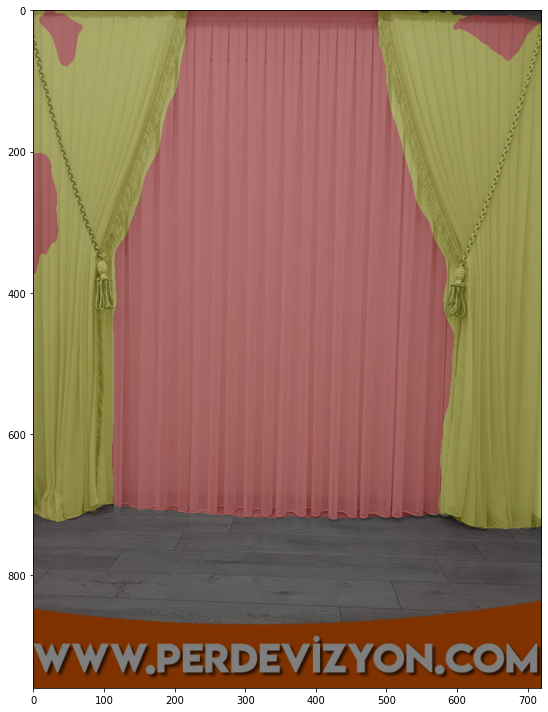

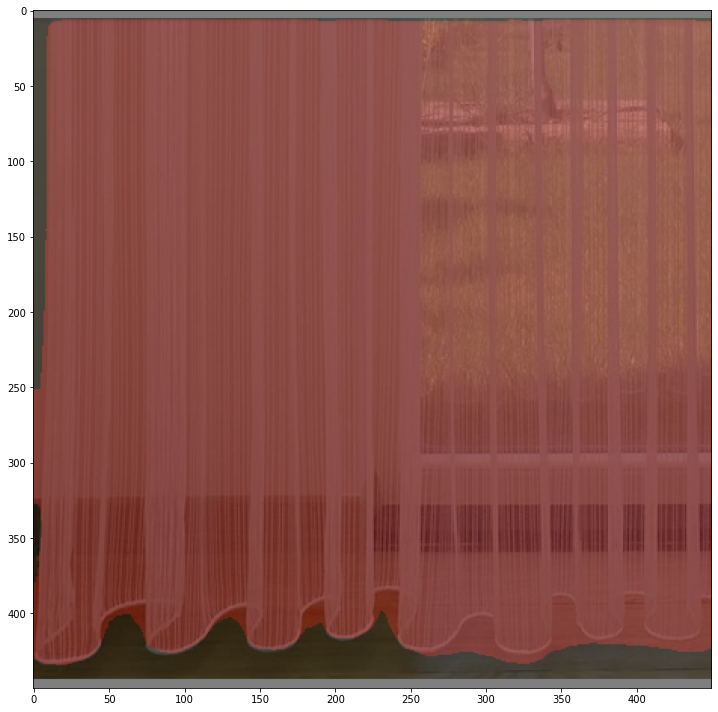

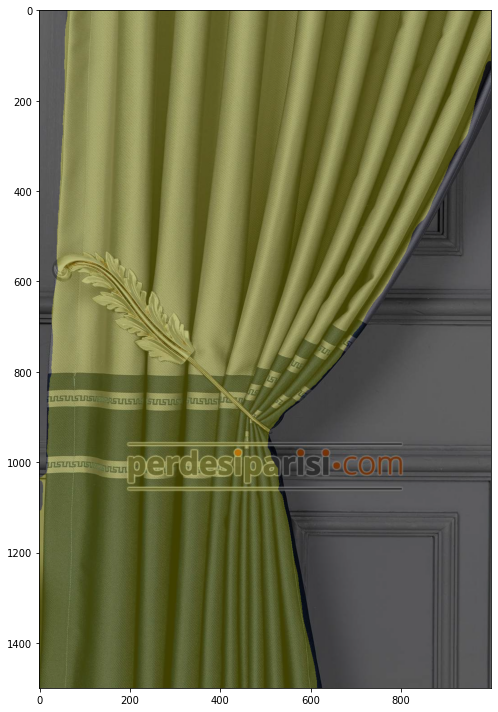

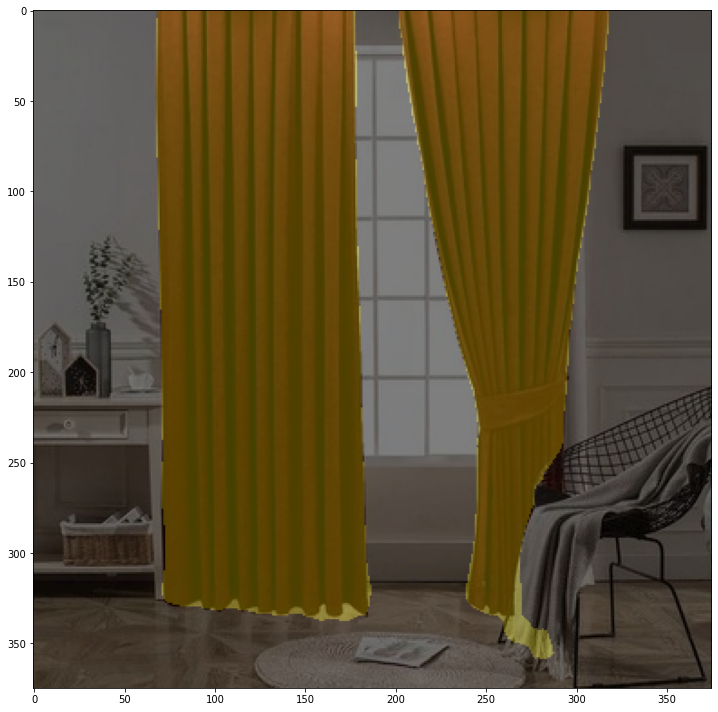

In [ ]:
dir2='/content/'
# veri seti disi ornekler
resimler=['ornek1.jpg' , 'ornek2.jpg' , 
          'ornek3.jpg', 'ornek4.jpg']
for img in resimler:
  result = inference_segmentor(model, dir2+img)
  show_result_pyplot(model, dir2+img, result,palette)